# Stop 4-body decay search using QML

One of the main objectives of CERN Quantum Technology Initiative (CERN QTI) is to investigate if quantum computing can be used in the field of high-energy physics. With this tutorial/exercise we are going to explore quantum machine learning through the use of Variational Quantum Circuits (VQCs) applied to solve the problem of classification between Supersymmetry (<font color='blue'>signal</font>) and Standard Model (<font color='red'>background</font>) type of events. 

The simulations used were produced by the CMS collaboration and aim to simulate proton-pronton collisions and detection by the CMS detector at tht LHC - CERN.

## Stop 4-Body decay in 1 lepton Final State

We are going to focus on the search for stop pair production where each stop decays via the four body decay mode and there's only a single lepton in the final state.

<div>
<img src="assets/stop.png" width="800"/>
</div>

We'll be looking in the compressed scenario where: Δm = m(stop)-m(neutralino) < 80 GeV using 2017 samples. Since we don't know the mass of the stop nor the mass of the neutralino our signal will be a Δm (from 10 to 80 GeV) composed of different signal points with the same Δm.

<div>
<img src="assets/sm.png" width="800"/>
</div>

Our background is all the standard model processes that have the same signature as the signal: <font color='blue'>1 lepton</font>, <font color='red'>jets</font> and <font color='green'>missing transverse energy(MET)</font>. To separate signal from background we're going to develop a Variational Quantum Classifier(VQC).

You'll find everything you need to know on the public CMS results: [CMS-PAS-SUS-21-003](https://cds.cern.ch/record/2813736)!

## Machine learning (general) approach

Use data samples to construct a model that minimizes cost of unseen data.

<div>
<img src="assets/ml.png" width="750"/>
</div>

## The Qubit

A qubit (or quantum bit) is a basic unit of quantum information, meaning we can take advantage of properties found in quantum mechanics and use them in our computations such as superposition and entanglement.

While the classic bit can only have a value of 1 **or** 0, a qubit can be in a superposition of 1 **and** 0. The qubit's **0** and **1** states are expressed as follows:

$\vert 0 \rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \vert 1 \rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

As a consequence of this mathematical description, unlike a bit, a qubit is not limited to being in one of these two states. Qubits can exist in what's known as a superposition of states. A superposition is a linear combination of two basis vectors. Mathematically:

$\vert \psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle = \alpha \begin{pmatrix} 1 \\ 0 \end{pmatrix} + \beta \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$ 

where $\alpha$ and $\beta$ are complex numbers and have to satisfy:

$\alpha\alpha^* + \beta\beta^* =1$

To note that when a qubit is in a superposition, it is not in both $\vert 0 \rangle$ and $\vert 1 \rangle$ "simultaneously", but is rather in some intermediate combination of the two. 

We can visualize a qubit as follows:

<div>
<img src="assets/Bloch_sphere.png" width="500"/>
</div>

This is called the Bloch sphere and you can play with it in [this demo](https://javafxpert.github.io/grok-bloch/)!

## A Quantum Circuit

_**Quantum circuits** are a common means of visually representing the sequence of operations that are performed on qubits during a quantum computation. They consist of a set of operations, or **gates**, applied to a set of qubits (or more generally, **wires**). Each wire in the diagram represents a qubit. Circuits are read from left to right, and this is the order in which operations are applied._

An example of a quantum circuit:

<div>
<img src="https://codebook.xanadu.ai/pics/circuit_i-2-1.svg" width="500"/>
</div>

_Quantum circuits end in a measurement of one or more qubits. For example, the circuit below has 3 qubits that start in state |0⟩, applies 5 operations, and measures every qubit at the end._

from https://codebook.xanadu.ai/I.2

Quantum computation is all about manipulating qubit states by using gates and seeing the outcome of such manipulations by measuring the qubits.

## The bit flip operation: NOT Gate

Performing quantum operations involves multiplication by matrices that send valid, normalized quantum states to other normalized quantum states. The simplest quantum operation as the following effect:

$X\vert 0 \rangle = \vert 1 \rangle$,

$X\vert 1 \rangle = \vert 0 \rangle$

Known as bit flip, Pauli-X or NOT gate, it can be mathematically represented as:

$X = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}$

and drawn in a quantum circuit diagram like:

<div>
<img src="https://codebook.xanadu.ai/pics/x.svg" width="250"/>
</div>

Let's now confirm that all of this works mathematically:


$X\vert 0 \rangle=\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \vert 1 \rangle$

We've flipped a quantum bit!

## Rotations, rotations, rotations: the RX, RZ, and RY Gates

As we saw, we can represent a qubit in 3D-space - the Bloch sphere. RX, RZ, and RY rotate the qubit's state vector about the appropriate axis.

<div>
<img src="https://codebook.xanadu.ai/pics/bloch_rotations.svg" width="750"/>
</div>

These operations become very useful in the context of QML because it means we can manipulate the qubits as a function of a parameter/angle $\theta$ in order to find some kind of optimum in the quantum algorithm we design.

The matrix representation of an $RX(\theta)$ is:

$RX(\theta)=\begin{pmatrix}
\cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2}) \\
-i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})
\end{pmatrix}$ 

## Multiple Qubit states

A single classical bit has 2 possible states, a qubit has 2 complex amplitudes. In a similar manner, 2 classical bits have 4 possible states:

00 01 10 11

To describe a state of 2 qubits, 4 complex amplitudes are required:

$\vert \psi \rangle = \psi_{00}\vert 00 \rangle + \psi_{01}\vert 01 \rangle + \psi_{10}\vert 10 \rangle + \psi_{11}\vert 11 \rangle = \begin{bmatrix} \psi_{00} \\ \psi_{01} \\ \psi_{10} \\ \psi_{11} \end{bmatrix}$

Such that the normalisation condition is respected:

$|\psi_{00}|^2 + |\psi_{01}|^2 + |\psi_{10}|^2 + |\psi_{11}|^2 = 1$

Let's suppose we have two separated qubits, $\vert a \rangle$ and $\vert b \rangle$:

$\vert a \rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \vert b \rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix}$

We can describe their collective state, or the state of the circuit of 2 qubits, using the kronecker product:

$\vert b \rangle \otimes \vert a \rangle = \vert ba \rangle = \begin{bmatrix}
b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\
b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}
\end{bmatrix} = \begin{bmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{bmatrix} = 
b_0a_0\vert 00 \rangle + b_0a_1\vert 01 \rangle + b_1a_0\vert 10 \rangle + b_1a_1\vert 11 \rangle$

## Entanglement and the CNOT Gate

Until here, we saw gates that act only on single qubits, to complete all the ingredients we need gates that can act on multiple qubits in order to _entangle_ them. The idea being entanglement is that knowing the state of a qubit, means knowing the state of another qubit. And the idea behind the CNOT gate is that we can use a qubit to control the state of another one. When this 2 concepts are merged together we can entagle qubits. Let's see how that's done.

By definition, a state is entangled if it cannot be described as a tensor product of individual qubit states (if it can, it is separable). An entangled state can only be described by specifying the full state. One example of an entangled state:

$\vert \psi \rangle = \frac{1}{\sqrt{2}} (\vert 00 \rangle + \vert 11 \rangle)$

In order to describe this state using the kronecker tensor we need to find $a_0$, $a_1$, $b_0$ and $b_1$ such that:

$b_0a_0=1 \\ b_0a_1=0 \\ b_1a_0=0 \\ b_1a_1=1$

as one can see, there is no solution, it's not possible to describe this state as two separate qubits, so **they are entangled!**

Let's now see how we can make such a state using the controlled-NOT or CNOT gate. This is a two-qubit gate that performs an operation (specifically, a Pauli X or NOT gate) on one qubit depending on the state of another:

<div>
<img src="https://codebook.xanadu.ai/pics/cnot.svg" width="250"/>
</div>

The first qubit, denoted with the solid dot, is the control qubit. The state of this qubit does not change, but its state is the one that determines whether the operation is performed. The second qubit is the target qubit. It's Matrix representation:

$CNOT = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 
\end{pmatrix}$

CNOT acting on the computational basis states $\vert ab \rangle$:

| $\vert ab \rangle$ | $CNOT_{ab}\vert ab \rangle$ |
|:------------------:|:---------------------------:|
| $\vert 00 \rangle$ | $\vert 00 \rangle$ |
| $\vert 01 \rangle$ | $\vert 01 \rangle$ |
| $\vert 10 \rangle$ | $\vert 11 \rangle$ |
| $\vert 11 \rangle$ | $\vert 10 \rangle$ |


If, the first qubit is the target and the second one the control, CNOT is:

$CNOT = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 
\end{pmatrix}$

We have seen how this acts on classical states, but let’s now see how it acts on a qubit in a superposition $\vert q_0 \rangle$ (see Note) and $\vert q_1 \rangle$ in state $\vert 0 \rangle$:

$\vert q_0 \rangle = \frac{1}{\sqrt{2}} (\vert 0 \rangle + \vert 1 \rangle)$; 

$\vert q_1 \rangle$ = $\vert 0 \rangle$

The statevector of such system is: $\begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 \end{bmatrix}$

$\vert q_0q_1 \rangle = \frac{1}{\sqrt{2}} (\vert 00 \rangle + \vert 01 \rangle)$ 

$\vert q_0q_1 \rangle$ is not entangled, but if we apply the CNOT gate:

$CNOT\vert q_0q_1 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 
\end{bmatrix} \begin{bmatrix} 1 \\ 1 \\ 0 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} (\vert 00 \rangle + \vert 11 \rangle)$

As we saw, this is an entangled state.


Note: this is known as the $\vert + \rangle$ state in the Bloch sphere and can be obtained by applaying an Hadamard gate to $\vert 0 \rangle$.

## Variational quantum circuits

VQCs are the practical embodiement of the idea: _Let's train our quantum computers like we train our neural networks_

<div>
<img src="assets/vqc_slide.png" width="750"/>
</div>

_it looks like trainable model in $\theta$..._

### How could quantum computing help with ML?

**Data**
1. speed up sampling from data distributions
1. use fewer data samples (e.g., Arunachalam 1701.06806)
**Model**
1. speed up existing models (Pararo et al. 1401.4997, Low et al. 1402.7359, Allcock et al. 1812.03089)
1. design better models (Amin et al. 1601.02036, Benedetti et al. 1906.07682)
**Cost**
1. speed up optimisation (Wiebe et al. 1204.5242, Rebentrost et al. 1307.0471,
Denil & Freitas ∼ 2012 cs.ubc.ca/ ̃nando/)
1. find better solutions


 ### **Can we take advantage from Quantum Machine Learning in High-Energy Physics?**

## The strategy

We want to somehow encode our information into qubits, create a relation between them and in the end measure a qubit. That qubit should tell us if the event that it processed is either a <font color='blue'>signal</font> type or <font color='red'>background</font> type of event: either SUSY or SM.

We are going to use supervised learning in a strategy similar to the one used in Neural Network:
1. Prepare labeled data
1. Build a trainable quantum circuit: Variational Quantum Circuit (VQC)
1. Train our VQC
1. Comparing quantum VS classical: VQC VS BDT
1. Conclusions

## Software needed

## Setup

In [1]:
import random
import uproot
import numpy

from itertools import chain

import pennylane as qml
from pennylane import numpy as np
np.random.seed(42)

from sklearn import decomposition
from sklearn import metrics as metrics
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

import pandas as pd

import matplotlib.pyplot as plt

from math import log

from alive_progress import alive_bar

## 1. Prepare labeled data

### loading the data

In [2]:
path = "/Users/ketchum/Desktop/STOP_nTuples/"
#path = "/Volumes/Samsung_T5/STOP_nTuples/"
trainPath = "nTuples17_nanoAOD_v2021-10-15_train/"
testPath = "nTuples17_nanoAOD_v2021-10-15_test/"

oneSamplePath = testPath

#sgName = "T2DegStop_deltaM30"
sgName = "T2DegStop_550_520_bdt"
bkName = "WJetsToLNu_HT200to400_bdt"
treename="bdttree"

myFeatures = ["Jet1Pt", "Met", "mt", "LepPt", "LepEta", "LepChg", "HT", "NbLoose","Njet", "JetHBpt", "DrJetHBLep", "JetHBDeepCSV","BDT"]
branches = ["XS","Nevt","Event","weight"]
branches.extend(myFeatures)

preSel = "(LepPt < 30) & (Met > 280) & (HT > 200) & (Jet1Pt > 110) & ((DPhiJet1Jet2 < 2.5) | (Jet2Pt < 60)) & (isTight == 1)"

In [3]:
# load root files
sgTree = uproot.open(path + oneSamplePath + sgName+".root:"+treename)
bkTree = uproot.open(path + oneSamplePath + bkName+".root:"+treename)

# select important events
sgDict = sgTree.arrays(branches,preSel,library="np")
bkDict = bkTree.arrays(branches,preSel,library="np")

### looking into the data

In [4]:
sgLepPt = sgDict["LepPt"]
sgJet1Pt = sgDict["Jet1Pt"]
sgMet = sgDict["Met"]
sgmt = sgDict["mt"]
sgW = sgDict["XS"]/sgDict["Nevt"]

bkLepPt = bkDict["LepPt"]
bkJet1Pt = bkDict["Jet1Pt"]
bkMet = bkDict["Met"]
bkmt = bkDict["mt"]
bkW = bkDict["XS"]/bkDict["Nevt"]

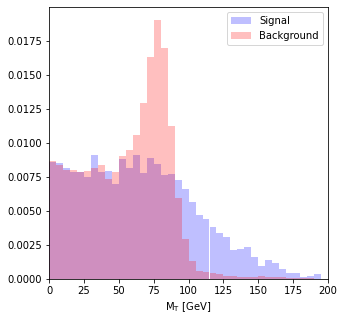

In [5]:
plt.rcParams["figure.figsize"] = [5, 5]
params = {"mathtext.default": "regular"}
plt.rcParams.update(params)
label=["Signal","Background"]
binning=np.arange(0,200,5)
plt.hist(sgmt, binning, density=True, color = "blue", alpha=0.25)
plt.hist(bkmt, binning, density=True, color = "red" , alpha=0.25) #histtype='step'
plt.legend(label, loc='best')
plt.xlim([0, 200])
plt.xlabel("$M_T$ [GeV]")
plt.show()

In [6]:
plt.rcParams['figure.figsize'] = [24, 24]

# plot all input variables and BDT output
plotInVars = False

if plotInVars:
    fig, axs = plt.subplots(5, 3)
    axs = axs.ravel()
    canvas = 0

    for feature in myFeatures:
        axs[canvas].hist(sgDict[feature], density=True, color = "blue", alpha=0.25)
        axs[canvas].hist(bkDict[feature], density=True, color = "red", alpha=0.25)
        axs[canvas].set_title(feature)
        canvas+= 1
    plt.show()
    
# Do 2D plots
plot2D = False

if plot2D:
    flist = ["LepPt", "Met", "Jet1Pt","mt","BDT"]
    
    fig, axs = plt.subplots(len(flist), len(flist))
    fig.subplots_adjust(hspace = 0.5, wspace=0.5)
    axs = axs.ravel()
    canvas = 0

    for xFeature in flist:
        for yFeature in flist:
            axs[canvas].scatter(sgDict[xFeature], sgDict[yFeature], color = "blue", alpha=0.25)
            axs[canvas].scatter(bkDict[xFeature], bkDict[yFeature], color = "red", alpha=0.25)
            axs[canvas].set_title(xFeature+" VS "+yFeature)
            canvas+= 1
    plt.show()

### labeling the data

In [7]:
# Fix signal XS
sgDict["XS"] = numpy.ones(sgJet1Pt.size)

## Add categoty: 1 for signal and -1 for background
sgDict["category"] = numpy.ones(sgJet1Pt.size)
bkDict["category"] = -numpy.ones(bkJet1Pt.size)

In [8]:
sgDF = pd.DataFrame(sgDict)
display(sgDF)

,XS,Nevt,Event,weight,Jet1Pt,Met,mt,LepPt,LepEta,LepChg,HT,NbLoose,Njet,JetHBpt,DrJetHBLep,JetHBDeepCSV,BDT,category
0,1.0,87155.0,374123372,1.925884e-06,328.250,338.813507,32.445465,9.298288,-1.311279,1.0,385.87500,0.0,2.0,57.62500,2.036685,0.101501,-0.040352,1.0
1,1.0,87155.0,374123482,5.222981e-07,225.125,286.211121,10.798179,16.495022,-0.524292,1.0,225.12500,0.0,1.0,225.12500,3.967097,0.023834,-0.055420,1.0
2,1.0,87155.0,374123588,2.045012e-06,301.500,307.996582,20.827509,15.660460,-0.959717,-1.0,301.50000,0.0,1.0,301.50000,3.419575,0.027069,-0.033337,1.0
3,1.0,87155.0,374123626,1.607914e-06,356.250,287.643860,53.294586,4.579830,-1.618896,1.0,356.25000,0.0,1.0,356.25000,1.642915,0.020233,-0.033937,1.0
4,1.0,87155.0,374123630,7.602142e-07,272.500,280.310059,23.213980,15.694098,0.392944,1.0,444.12500,0.0,3.0,116.62500,1.480006,0.053009,-0.088034,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446,1.0,87155.0,420187634,1.635522e-06,275.750,322.343079,147.370346,18.416704,0.764893,1.0,449.25000,1.0,3.0,124.62500,1.259977,0.156128,0.066372,1.0
3447,1.0,87155.0,420187720,2.002629e-06,403.500,413.531799,12.847763,8.921799,1.460449,-1.0,403.50000,0.0,1.0,403.50000,4.561334,0.038330,0.166194,1.0
3448,1.0,87155.0,421149834,9.760236e-07,300.750,317.044922,12.325584,19.914648,-0.663086,1.0,756.59375,0.0,5.0,227.50000,3.025809,0.060730,-0.094158,1.0
3449,1.0,87155.0,421149896,2.113200e-06,309.000,293.009735,39.851105,3.594147,0.234131,1.0,309.00000,0.0,1.0,309.00000,3.003863,0.083862,0.053850,1.0


In [9]:
bkDF = pd.DataFrame(bkDict)
display(bkDF)

,XS,Nevt,Event,weight,Jet1Pt,Met,mt,LepPt,LepEta,LepChg,HT,NbLoose,Njet,JetHBpt,DrJetHBLep,JetHBDeepCSV,BDT,category
0,407.899994,21250516.0,189048,0.000036,274.500,297.068298,79.009308,9.031775,-0.397217,1.0,306.312500,1.0,2.0,274.50000,2.148179,0.363770,-0.118339,-1.0
1,407.899994,21250516.0,90293336,0.000018,268.250,286.475708,84.348068,9.050957,-2.047852,1.0,268.250000,0.0,1.0,268.25000,1.234227,0.025406,-0.305103,-1.0
2,407.899994,21250516.0,90466850,0.000009,246.000,336.930298,37.020103,16.162477,2.054688,1.0,333.062500,1.0,3.0,246.00000,2.814651,0.217407,-0.319604,-1.0
3,407.899994,21250516.0,90469736,0.000016,195.375,295.634155,35.654419,15.941186,1.597412,1.0,236.468750,0.0,2.0,41.09375,0.065507,0.044342,-0.207638,-1.0
4,407.899994,21250516.0,91567654,0.000013,273.500,287.097992,52.644104,25.188814,-0.401367,1.0,311.343750,0.0,2.0,273.50000,2.508552,0.091248,-0.280593,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,407.899994,21250516.0,152631090,0.000022,248.750,314.892456,21.300955,18.836704,0.046455,1.0,248.750000,0.0,1.0,248.75000,2.892932,0.020370,-0.115660,-1.0
14318,407.899994,21250516.0,152643054,0.000036,170.250,286.796326,182.189713,29.295141,-0.090790,-1.0,293.515625,1.0,3.0,91.62500,1.816064,0.227783,0.082563,-1.0
14319,407.899994,21250516.0,151914248,0.000017,365.000,325.963867,50.323734,21.449633,0.288025,-1.0,365.000000,0.0,1.0,365.00000,2.629984,0.012329,-0.080049,-1.0
14320,407.899994,21250516.0,151988422,0.000015,382.250,347.942535,86.076271,22.533623,-2.228027,1.0,382.250000,0.0,1.0,382.25000,2.369875,0.054871,-0.371374,-1.0


### preparing data for our quantum circuit

In [10]:
def dataForQDevice(n_evts, sampleDict, features):
    tensor = np.zeros([n_evts,len(features)])
    for ev in range(0,n_evts):
        event = np.zeros([1,len(features)])
        for feature in range(0,len(features)):
            event[0][feature] = sampleDict[features[feature]][ev]
            #event[0][feature] = sampleDict[features[feature]][ev]*sampleDict["XS"][ev]/n_evts
        tensor[ev] = event
    
    return tensor

In [11]:
# events to train
n_evts = 512

features   = ["LepPt", "Met", "Jet1Pt","mt","HT","JetHBpt"]
n_features = len(features)
weights    = ["XS","Nevt"]
features.extend(weights)

sg_evts = n_evts # use sgJet1Pt.size if you want to use the complete sample size
bk_evts = n_evts # use bkJet1Pt.size if ...

# get events to train in the VQC - features
X0 = dataForQDevice(sg_evts,sgDict,features)
X1 = dataForQDevice(bk_evts,bkDict,features)

# events category
Y0 = np.array(sgDict["category"][:sg_evts])
Y1 = np.array(bkDict["category"][:bk_evts])

# events weight
W0 = np.array(sgDict["XS"][:sg_evts])/np.array(sgDict["Nevt"][:sg_evts])
W1 = np.array(bkDict["XS"][:bk_evts])/np.array(bkDict["Nevt"][:bk_evts])

X = np.concatenate([X0,X1], axis=0)
Y = np.concatenate([Y0,Y1], axis=0)
W = np.concatenate([W0,W1], axis=0)

### normalizing data for the quantum model

We are going to be performing rotations on the qubits, the idea is to encode our data into **angles** and perform rotations until our final measurment gives us the predicted category for the event.

In [12]:
# normalize features
X[:,:-2] = minmax_scale(X[:,:-2],feature_range=(0, numpy.pi))

# split data into train + validation and test
X_train_val , X_test , y_train_val , y_test=train_test_split(X , Y , test_size=0.2)

## 2. Build a trainable quantum circuit: Variational Quantum Circuit (VQC)

In [13]:
# we enconde each feature in a qubit
n_qubits = n_features

# start a quantum device with n_features qubits
dev = qml.device('default.qubit', wires=n_qubits) # qml.device('qiskit.aer', wires=n_qubits)
                                                  # if you want to use IBM's qiskit

### angle embedding
_Encodes **N** features into the **rotation angles** of **n qubits**, where N≤n._

This is the first step into turning our data into quantum information.

### strongly entangling layers

_Layers consisting of single qubit rotations and entanglers, inspired by the circuit-centric classifier design [arXiv:1804.00633](https://arxiv.org/abs/1804.00633)_

<div>
<img src="assets/stronggly_entangling_layers.png" width="750"/>
</div>

In [14]:
# quantum circuit
@qml.qnode(dev)
def circuit(weights, x=None):
    qml.templates.AngleEmbedding(x, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(wires=0))

# variational quantum classifier
def variational_classifier(theta_weights, theta_bias, x=None):
    weights=theta_weights
    bias=theta_bias
    return circuit(weights, x=x)+bias

In [15]:
# number of quantum layers
n_layers = 3

# draw random quantum node weights / initial weights
theta_weights = 0.01 * np.random.randn(n_layers, n_qubits, 3, requires_grad=True)
theta_bias = np.array(0.0, requires_grad=True)
circuit(theta_weights, X[2,:-2])

plotCircuit = False
if plotCircuit:
    drawer = qml.draw(circuit)
    print(qml.draw(circuit)(theta_weights, X[2,:-2]))
    plt.rcParams['figure.figsize'] = [10,5]
    qml.drawer.use_style('black_white')
    fig, ax = qml.draw_mpl(circuit)(theta_weights, X_test[2,:-2])
    fig.show()

### our trainable circuit

<div>
<img src="assets/Qiskit_diagram_labeled.png" width="1000"/>
</div>

## 3. Train our VQC

In [16]:
# split into train and validation
X_train , X_val , y_train , y_val = train_test_split(X_train_val, y_train_val, test_size =0.20)

# pca
doPCA=False

if doPCA:
    pca = decomposition.PCA(n_components=len(features)).fit(X_train)
    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)

data_train = list(zip(X_train, y_train))
data_val  = list(zip(X_val, y_val))

# select learning batch size
batch_size = 8

# calculate number of batches
batches = len(X_train)// batch_size

# select number of epochs
n_epochs = 5

### choosing an optimizer

In [17]:
# build the optimizer object
pennylane_opt = qml.AdagradOptimizer(0.3) # GradientDescentOptimizer(0.2) # NesterovMomentumOptimizer(0.3) # QNGOptimizer(0.1,approx="block-diag")

### weighted loss function, accuracy and final prediction

In [18]:
def loss(a, b):
    return (a - b)**2

def average_loss(theta_weights, theta_bias, data):
    c = 0
    sumWeights = 0
    for x, y in data:
        XS   = x[-2:-1]
        Nevt = x[-1]
        weight = float(XS/Nevt)
        prediction = variational_classifier(theta_weights, theta_bias, x[:-2])
        #prediction = np.sign(variational_classifier(theta_weights, theta_bias, x))
        c += (loss(prediction, y) * weight)
        sumWeights += weight
    return c/(len(data)*sumWeights)

def accuracy(theta_weights, theta_bias, data):
    y_pred = []
    y_true = []

    for x, y in data:
        prediction = np.sign(variational_classifier(theta_weights, theta_bias, x[:-2]))
        y_pred.append(prediction)
        y_true.append(y)

    accuracy = metrics.accuracy_score(y_true, y_pred)
    return accuracy    

# prediction in tensor format for training the quantum circuit
def prediction(theta_weights, theta_bias, X):
    y_pred = []
    for x in X:
        prediction = variational_classifier(theta_weights, theta_bias, x[:-2])
        y_pred.append(prediction)
        
    return y_pred

# prediction in numpy array format for plotting
def prediction_numpy(theta_weights, theta_bias, X):
    y_pred = numpy.array([])
    for x in X:
        #prediction = np.sign(variational_classifier(theta_weights, theta_bias, x[:-2]))
        prediction = variational_classifier(theta_weights, theta_bias, x[:-2])
        y_pred = numpy.append(y_pred,prediction)
        
    return y_pred

### training

In [19]:
loss_train  = []
loss_val    = []
accur_train = []
accur_val   = []

# train in ordered batches
X_batches = np.array_split(np.arange(len(X_train)), batches)
with alive_bar(batches*n_epochs,force_tty=True) as bar:
    for it , batch_index in enumerate ( chain (*( n_epochs * [ X_batches ]))):
        y_train_batch = y_train[batch_index]
        X_train_batch = X_train[batch_index]
        data_train_batch = list(zip(X_train_batch, y_train_batch))
        
        ([theta_weights, theta_bias], avg_loss_batch) = pennylane_opt.step_and_cost(
            lambda theta_weights_, theta_bias_: average_loss(
            theta_weights_, theta_bias_, data_train_batch), theta_weights, theta_bias)

        bar()

|████████████████████████████████████████| 405/405 [100%] in 2:40.8 (2.52/s)                                            )  ▃▁▃ 37/405 [9%] in 15s (2.5/s, eta: 2:28)  ▄▂▂ 56/405 [14%] in 22s (2.5/s, eta: 2:19) ▆▄▂ 73/405 [18%] in 29s (2.5/s, eta: 2:11)  ▂▄▆ 143/405 [35%] in 56s (2.6/s, eta: 1:42) in 1:29 (2.6/s, eta: 1:09)  ▇▅▃ 306/405 [76%] in 2:00 (2.5/s, eta: 39s)  315/405 [78%] in 2:04 (2.5/s, eta: 36s) ▁▃▅ 328/405 [81%] in 2:09 (2.5/s, eta: 31s) ▅▃▁ 352/405 [87%] in 2:19 (2.5/s, eta: 21s) 


In [20]:
plotLoss = False

if plotLoss:
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.subplots_adjust(hspace = 0.5, wspace=0)
    ax1.set_title("Loss")
    ax1.plot(loss_train, label="train")
    ax1.plot(loss_val, label="val")
    ax1.legend(loc="upper right")
    ax2.set_title("Accuracy")
    ax2.plot(accur_train, label="train")
    ax2.plot(accur_val, label="val")
    ax2.legend(loc="lower right")

### plot ROC

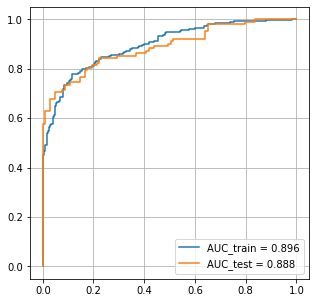

In [21]:
plt.rcParams['figure.figsize'] = [5,5]

y_pred_train = prediction(theta_weights, theta_bias, X_train)
y_pred_test  = prediction(theta_weights, theta_bias, X_test)

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)

roc_auc_train = metrics.auc(fpr_train,tpr_train)
roc_auc = metrics.auc(fpr,tpr)

plt.plot(fpr_train,tpr_train, label='AUC_train = %0.3f' % (roc_auc_train))
plt.plot(fpr,tpr, label='AUC_test = %0.3f' % (roc_auc))
plt.grid()
plt.legend(loc="lower right")

In [22]:
# accuracy metrics
data_test = list(zip(X_test, y_test))

acc_test  = accuracy(theta_weights, theta_bias, data_test)
acc_train = accuracy(theta_weights, theta_bias, data_train)
acc_val   = accuracy(theta_weights, theta_bias, data_val)

print("Acc train: {:0.1f} % | val: {:0.1f} % | test: {:0.1f} %"
      "".format(acc_train*100, acc_val*100, acc_test*100))

Acc train: 73.3 % | val: 78.7 % | test: 74.1 %


## 4. Comparing quantum VS classical: VQC VS BDT

### classification output from VQC

In [23]:
# classification of the events used in this exercise by the VQC
y_sig = prediction_numpy(theta_weights, theta_bias, X[:n_evts])
y_bkg = prediction_numpy(theta_weights, theta_bias, X[n_evts:])

### classification output from BDT

In [24]:
# by the BDT, this one done apriori
BDT0 = np.array(sgDict["BDT"][:sg_evts])
BDT1 = np.array(bkDict["BDT"][:bk_evts])
BDT = np.concatenate([BDT0,BDT1], axis=0)

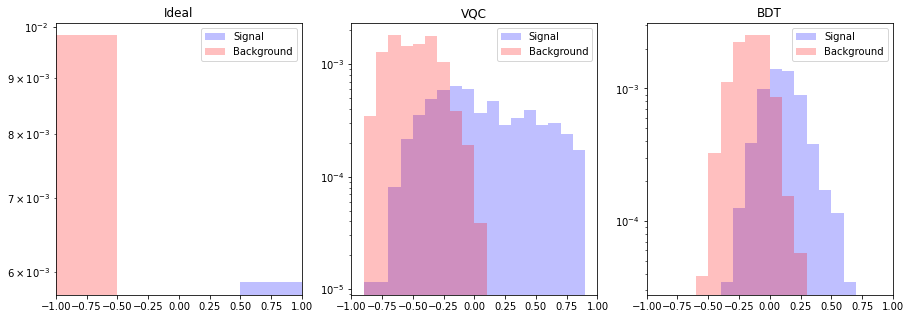

In [25]:
# plotting the prediction vs the real value
plt.rcParams['figure.figsize'] = [15,5]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
binning=np.arange(-1,1,0.1)

ax1.set_title("Ideal")
ax1.hist(Y0, 1, weights=W0, color = "blue", alpha=0.25, label="Signal")
ax1.hist(Y1, 1, weights=W1, color = "red" , alpha=0.25, label="Background")
ax1.set_yscale("log")
ax1.set_xlim([-1, 1])
ax1.legend(loc="best")

ax2.set_title("VQC")
ax2.hist(y_sig, bins=binning, color = "blue", weights=W0, alpha=0.25, label="Signal")
ax2.hist(y_bkg, bins=binning, color = "red" , weights=W1, alpha=0.25, label="Background")
ax2.set_yscale("log")
ax2.set_xlim([-1, 1])
ax2.legend(loc="best")

ax3.set_title("BDT")
ax3.hist(BDT0, bins=binning, color = "blue", weights=W0, alpha=0.25, label="Signal")
ax3.hist(BDT1, bins=binning, color = "red" , weights=W1, alpha=0.25, label="Background")
ax3.set_yscale("log")
ax3.set_xlim([-1, 1])
ax3.legend(loc="best")

### comparing ROCs

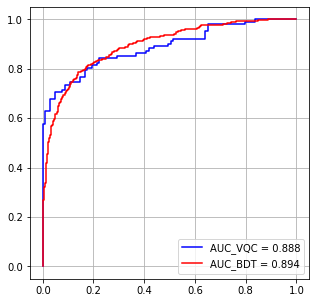

In [26]:
fpr_BDT, tpr_BDT, thresholds_BDT = metrics.roc_curve(Y, BDT)

roc_auc_BDT = metrics.auc(fpr_BDT,tpr_BDT)

plt.rcParams['figure.figsize'] = [5,5]

plt.plot(fpr,tpr, color = "blue", label='AUC_VQC = %0.3f' % (roc_auc))
plt.plot(fpr_BDT,tpr_BDT, color = "red", label='AUC_BDT = %0.3f' % (roc_auc_BDT))
plt.grid()
plt.legend(loc="lower right")

### Figure of Metric (FOM)

Until now, it's not obvious which algorithm is better and the overall impact of using it in the search for supersymmetry. We need to build a function that takes as inputs the <font color='blue'>signal</font> and <font color='red'>background</font> yield precicted by placig a 1-D cut on the output our machine learning algorithm (remember, this type of methods take N-Dimensional variables and translate them into a 1-D output). In experimental particle physics we call this funtion a Figure of Metric(FOM):

$ FOM = \sqrt{2((S+B)ln(\frac{(S+B)\cdot(B+\sigma_B^2)}{B^2+(S+B)\cdot\sigma_B^2})-\frac{B^2}{\sigma_B^2}ln(1+\frac{\sigma_B^2\cdot S}{B\cdot(B+\sigma_B^2)}))}$


In [27]:
# Signal test events 
sgDict_test = {
    "VQC": y_sig,
    "BDT": sgDict["BDT"][:sg_evts],
    "weight": sgW[:sg_evts]
}

sgDF_test = pd.DataFrame(sgDict_test)

sg_sf = 2 * len(sgDF_test) / len(sgDF)

# Background test events 
bkDict_test = {
    "VQC": y_bkg,
    "BDT": bkDict["BDT"][:bk_evts],
    "weight": bkW[:bk_evts]
}

bkDF_test = pd.DataFrame(bkDict_test)

bk_sf = 2 * len(bkDF_test) / len(bkDF)

In [28]:
# measure the process yield as a function of the ML cut
def getYield(dataPD, ml="VQC", cut=0.0, luminosity=41479, splitfactor=2):
    if ml == "VQC":
        selEvents = dataPD[dataPD.VQC>cut]
    elif ml == "BDT":
        selEvents = dataPD[dataPD.BDT>cut]
    
    Yield = selEvents.weight.sum() * luminosity * splitfactor
    YieldUnc = np.sqrt(np.sum(np.square(selEvents.weight))) * luminosity * splitfactor
    
    return Yield, YieldUnc

In [29]:
# FOM as a function of the signal and background yields for different ML output cuts
def FOM(signal, background, f=0.20):
    s, sErr = signal
    b, bErr = background
    if b == 0: b=0.0001 # check if NaN => TODO: fix this hack
    sigmaB2 = (f*b)**2  # we set the relative uncertainty of the background yield
                        # to be 20%: f=0.20       
    term1 = (s+b)*log(((s+b)*(b+sigmaB2))/(b**2+(s+b)*sigmaB2))
    term2 = b**2/sigmaB2*log(1+(sigmaB2*s)/(b*(b+sigmaB2)))

    fom = (2*term1-term2)**0.5
    
    return fom

Now, we want to see how the FOM evolves as a function of the ML output for both methods and compare them.

In [30]:
# compute fom as a function of ML cut
cuts = numpy.arange(-0.4, 0.4, 0.01)

fomEvo_vqc = []
sgEff_vqc = []
bkEff_vqc = []
sgYield_vqc_init = getYield(sgDF_test, "VQC", cuts[0], splitfactor=sg_sf)[0]
bkYield_vqc_init = getYield(bkDF_test, "VQC", cuts[0], splitfactor=sg_sf)[0]

fomEvo_bdt = []
sgEff_bdt = []
bkEff_bdt = []
sgYield_bdt_init = getYield(sgDF_test, "BDT", cuts[0], splitfactor=sg_sf)[0]
bkYield_bdt_init = getYield(bkDF_test, "BDT", cuts[0], splitfactor=sg_sf)[0]

for cut in cuts:
    sgYield_vqc = getYield(sgDF_test, "VQC", cut, splitfactor=sg_sf)
    bkYield_vqc = getYield(bkDF_test, "VQC", cut, splitfactor=sg_sf)
    fom_vqc = FOM(sgYield_vqc, bkYield_vqc)
    fomEvo_vqc.append(fom_vqc)
    sgEff_vqc.append(sgYield_vqc[0]/sgYield_vqc_init)
    bkEff_vqc.append(bkYield_vqc[0]/bkYield_vqc_init)
    
    sgYield_bdt = getYield(sgDF_test, "BDT", cut, splitfactor=sg_sf)
    bkYield_bdt = getYield(bkDF_test, "BDT", cut, splitfactor=bk_sf)
    fom_bdt = FOM(sgYield_bdt, bkYield_bdt)
    fomEvo_bdt.append(fom_bdt)
    sgEff_bdt.append(sgYield_bdt[0]/sgYield_bdt_init)
    bkEff_bdt.append(bkYield_bdt[0]/bkYield_bdt_init)

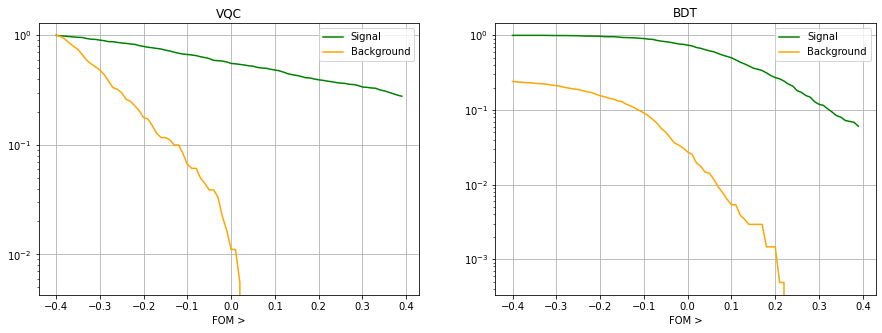

In [31]:
# plot efficiencies
plt.rcParams['figure.figsize'] = [15,5]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title("VQC")
ax1.plot(cuts,sgEff_vqc, color = "green", label="Signal")
ax1.plot(cuts,bkEff_vqc, color = "orange", label="Background")
ax1.set_xlabel("FOM >")
ax1.set_yscale("log")
ax1.grid()
ax1.legend(loc='best')

ax2.set_title("BDT")
ax2.plot(cuts,sgEff_bdt, color = "green", label="Signal")
ax2.plot(cuts,bkEff_bdt, color = "orange", label="Background")
ax2.set_xlabel("FOM >")
ax2.set_yscale("log")
ax2.grid()
ax2.legend(loc='best')

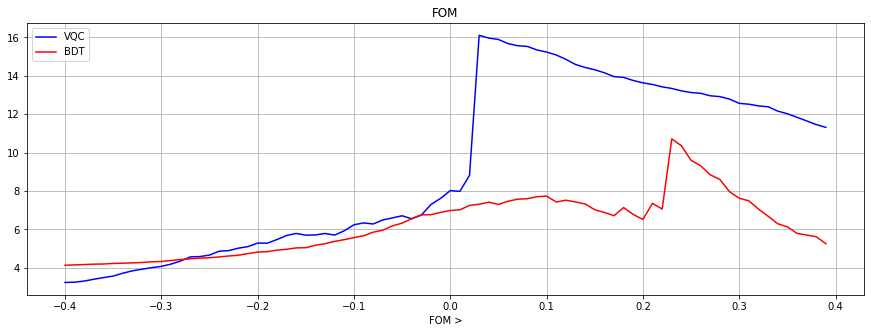

In [32]:
# plot fom
plt.title("FOM")
plt.plot(cuts,fomEvo_vqc, color = "blue", label="VQC")
plt.plot(cuts,fomEvo_bdt, color = "red", label="BDT")
plt.xlabel("FOM >")
plt.legend(loc='upper left')
plt.grid()

## 6. Conclusions

- We showed that with quantum simulation we can use the ideas of quantum mechanics to build a classifier suitable for High Energy Physics
- Like BDTs, VQCs are linear classifiers and have similar performance: VQCs don't provide any known advantage. The key is in how we embedd the feature map 
- VQCs can achieve the performance of BDTs with less epochs and samples

### References

https://arxiv.org/abs/1804.00633

https://conference.ippp.dur.ac.uk/event/929/attachments/3968/4559/piotr_gawron_quantum_neural_networks.pdf

https://pennylane.ai/qml/demos/tutorial_variational_classifier.html

https://youtu.be/YtepXvx5zdI

Images from: https://indico.cern.ch/event/975609/attachments/2183541/3688998/seminar_slides.pdf

### some testing...

In [33]:
sgYield_vqc = getYield(sgDF_test, "VQC", -0.1, splitfactor=sg_sf)
sgYield_vqc

(14.847833014474128, 0.8529857851282061)

In [34]:
bkYield_vqc = getYield(bkDF_test, "VQC", -0.1, splitfactor=sg_sf)
bkYield_vqc

(2.8349713812320694, 0.8183858161605949)

In [35]:
sgYield_bdt = getYield(sgDF_test, "BDT", -0.1, splitfactor=sg_sf)
sgYield_bdt

(22.73727321818199, 1.055551633849779)

In [36]:
bkYield_bdt = getYield(bkDF_test, "BDT", -0.1, splitfactor=bk_sf)
bkYield_bdt

(10.645114125760635, 0.778447879928065)

In [37]:
FOM(sgYield_vqc, bkYield_vqc)

6.2395851439704035

In [38]:
FOM(sgYield_bdt, bkYield_bdt)

5.570489417646349